# Core Imports and Setup

In [1]:
import os
from pathlib import Path

import warnings
warnings.filterwarnings("ignore")

import logging
logging.getLogger("openff.toolkit").setLevel(logging.ERROR)

from openff import toolkit, evaluator

from openff.units import unit
import pandas as pd

# 1) - Loading ThermoML Data Sets

## Extracting data from ThermoML

In [2]:
from openff.evaluator.datasets import PhysicalProperty, PropertyPhase, PhysicalPropertyDataSet
from openff.evaluator.datasets.thermoml import thermoml_property, ThermoMLDataSet

data_set_initial = PhysicalPropertyDataSet.from_json("freesolv.json")
data_set_initial.to_pandas()

,Id,Temperature (K),Pressure (kPa),Phase,N Components,Component 1,Role 1,Mole Fraction 1,Exact Amount 1,Component 2,Role 2,Mole Fraction 2,Exact Amount 2,SolvationFreeEnergy Value (kJ / mol),SolvationFreeEnergy Uncertainty (kJ / mol),Source
0,265c7378309c4355aa01d60af70d3fca,298.15,101.325,Liquid,2,O,Solvent,1.0,None,CCCCCC(=O)OC,Solute,None,1,-10.41816,2.5104,10.1021/ct050097l
1,f89c43a7ef684aca89df924b29c487b1,298.15,101.325,Liquid,2,O,Solvent,1.0,None,CCCCO,Solute,None,1,-19.74848,2.5104,10.1021/ct050097l
2,198b886769694cc39828af5af498fd24,298.15,101.325,Liquid,2,O,Solvent,1.0,None,Clc1ccc(-c2cc(Cl)c(Cl)c(Cl)c2Cl)cc1Cl,Solute,None,1,-12.71936,0.4184,10.1007/s10822-012-9568-8
3,6cdf0d7abd354d8284ffe115d4c0ef33,298.15,101.325,Liquid,2,O,Solvent,1.0,None,NC1CCCCC1,Solute,None,1,-19.20456,2.5104,10.1021/ct050097l
4,e3e4778832a240eba754b5d4d010d21d,298.15,101.325,Liquid,2,O,Solvent,1.0,None,O=COc1ccccc1,Solute,None,1,-15.98288,2.5104,10.5281/zenodo.596537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,0821476bf69143c4bd07f6e0d7f8e584,298.15,101.325,Liquid,2,O,Solvent,1.0,None,Cl/C=C/Cl,Solute,None,1,-3.26352,2.5104,10.1021/ct050097l
638,2e03601fd70142dd8092cc1eceb17b83,298.15,101.325,Liquid,2,O,Solvent,1.0,None,CCc1ccc(C)cc1,Solute,None,1,-3.97480,2.5104,10.1021/ct050097l
639,4ceca25966d64d3c88b9380829e7fa86,298.15,101.325,Liquid,2,O,Solvent,1.0,None,CCBr,Solute,None,1,-3.09616,2.5104,10.1021/ct050097l
640,bca16f5d94f54cf987903bcec2f9662b,298.15,101.325,Liquid,2,O,Solvent,1.0,None,CC(C)SC(C)C,Solute,None,1,-5.06264,2.5104,10.1021/ct050097l


In [3]:
print(len(data_set_initial))
print(data_set_initial.property_types)
print(data_set_initial.substances)

642
{'SolvationFreeEnergy'}
{<Substance C=C(C)[C@@H]1CC=C(C)[C@@H](O)C1{sol}{n=1}|O{solv}{x=1.000000}>, <Substance CCCCCCCI{sol}{n=1}|O{solv}{x=1.000000}>, <Substance CC=O{sol}{n=1}|O{solv}{x=1.000000}>, <Substance Oc1ccccc1I{sol}{n=1}|O{solv}{x=1.000000}>, <Substance CCCCCCC(C)=O{sol}{n=1}|O{solv}{x=1.000000}>, <Substance CCCC(C)(C)O{sol}{n=1}|O{solv}{x=1.000000}>, <Substance OC1CCCCCC1{sol}{n=1}|O{solv}{x=1.000000}>, <Substance CC(C)(C)c1ccc(O)cc1{sol}{n=1}|O{solv}{x=1.000000}>, <Substance O=Cc1ccccc1O{sol}{n=1}|O{solv}{x=1.000000}>, <Substance CCCCCCI{sol}{n=1}|O{solv}{x=1.000000}>, <Substance CC(=O)c1ccncc1{sol}{n=1}|O{solv}{x=1.000000}>, <Substance CC(=O)OC(C)OC(C)=O{sol}{n=1}|O{solv}{x=1.000000}>, <Substance CC[C@@H](C)CO{sol}{n=1}|O{solv}{x=1.000000}>, <Substance CNC{sol}{n=1}|O{solv}{x=1.000000}>, <Substance COc1ccccc1OC{sol}{n=1}|O{solv}{x=1.000000}>, <Substance CN1CCN(C)CC1{sol}{n=1}|O{solv}{x=1.000000}>, <Substance C1=CC=CCC=C1{sol}{n=1}|O{solv}{x=1.000000}>, <Substance CC(=

In [4]:
data_set_hmix = PhysicalPropertyDataSet.from_json("training-properties-with-water.json")

## Getting smiles

In [5]:
from rdkit import Chem
from rdkit.Chem import FilterCatalog
from openff.evaluator.substances import Component, Substance

In [6]:
subs_hmix=list(set(data_set_hmix.substances))
smiles_hmix_list=[]

for i in subs_hmix:
    comps=[]
    comps.append(i.components[0].smiles)
    comps.append(i.components[1].smiles)
    for o in comps:
        comps.remove('O')
        [smiles_hmix_list.append(y) for y in comps]

In [7]:
subs=list(set(data_set_initial.substances))
smiles_list=[]

for i in subs:
    comps=[]
    comps.append(i.components[0].smiles)
    comps.append(i.components[1].smiles)
    for o in comps:
        comps.remove('O')
        [smiles_list.append(y) for y in comps]

mols_list=[]

for s in smiles_list:
    m=Chem.MolFromSmiles(s)
    mols_list.append(m)

In [8]:
smiles_hmix_list=list(set(smiles_hmix_list))

In [9]:
def check_lists(A, B):
    # Convert lists A and B to sets to remove duplicates
    set_A = set(A)
    set_B = set(B)
    
    # Find the intersection (elements present in both sets)
    present = set_A.intersection(set_B)
    
    # Find the difference (elements in A that are not in B)
    missing = set_A.difference(set_B)
    
    # Check if all elements in A are present in B
    all_present = set_A.issubset(set_B)
    
    return all_present, list(present), list(missing)


all_present, present, missing = check_lists(smiles_hmix_list, smiles_list)

print("All values of A exist in B:", all_present)
if not all_present:
    print("Present elements:", present)
    print("Missing elements:", missing)

All values of A exist in B: False
Present elements: ['CN1CCOCC1', 'C1CCNCC1', 'CN1CCCCC1', 'CN1CCNCC1', 'CC(C)O', 'OCC(O)CO', 'Cn1ccnc1', 'CCCOC(C)=O', 'C1COCCN1', 'Cc1cccnc1', 'Cc1ccncc1']
Missing elements: ['OCCOCCO', 'CN(C)CCO', 'NCCCO', 'CNCCO', 'OCCN(CCO)CCO', 'OCCNCCO', 'OCCN1CCOCC1', 'CCN(CC)CCO', 'NCCCNCCCN', 'CN(CCO)CCO', 'NCCNCCN', 'OC1=NCCC1', 'CN(C)CCCO', 'NCCNCCO']


In [10]:
def get_func_smiles(smiles_list):
    mols_list=[]

    for s in smiles_list:
        m=Chem.MolFromSmiles(s)
        mols_list.append(m)

    alcohols=[]
    aldehydes=[]
    amines=[]
    carboxylics=[]
    halogens=[]
    nitros=[]
    sulf_chlorides=[]
    terminal_alkynes=[]
    other=[]
    
    fc = FilterCatalog.GetFunctionalGroupHierarchy()
    for i in range(len(mols_list)):
        whtv=mols_list[i]
        if not fc.GetMatches(whtv):
            other.append(i)
        else:
            for match in fc.GetMatches(whtv):
                ffg=match.GetDescription()
                # print(i,ffg)
                if ffg == 'Amine':
                    amines.append(i)
                elif ffg == 'Alcohol':
                    alcohols.append(i)
                elif ffg == 'Aldehyde':
                    aldehydes.append(i)
                elif ffg == 'CarboxylicAcid':
                    carboxylics.append(i)
                elif ffg == 'Halogen':
                    halogens.append(i)
                elif ffg == 'Nitro':
                    nitros.append(i) 
                elif ffg == 'SulfonylChloride':
                    sulf_chlorides.append(i)
                elif ffg == 'TerminalAlkyne':
                    terminal_alkynes.append(i)       
    

    def get_smiles(func_type):
        smiles=[]

        for x in func_type:
            comp0=subs[x].components[0].smiles
            comp1=subs[x].components[1].smiles
            if comp0 != 'O':
                smiles.append(comp0)
            if comp1 != 'O':
                smiles.append(comp1)
            # smiles.append(comp0) 
            # smiles.append(comp1)
        smiles.append('O')
        return smiles

    smiles_results={}

    smiles_results['all']=smiles_list
    smiles_results['alcohols']=get_smiles(alcohols)
    smiles_results['aldehydes']=get_smiles(aldehydes)
    smiles_results['carboxylics']=get_smiles(carboxylics)
    smiles_results['halogens']=get_smiles(halogens)
    smiles_results['amines']=get_smiles(amines)
    smiles_results['nitros']=get_smiles(nitros)
    smiles_results['sulf_chlorides']=get_smiles(sulf_chlorides)
    smiles_results['terminal_alkynes']=get_smiles(terminal_alkynes)
    smiles_results['other']=get_smiles(other)

    return smiles_results

    

In [11]:
smiles_results=get_func_smiles(smiles_list)

In [12]:
smiles_df=pd.DataFrame(dict([(key, pd.Series(value)) for key, value in smiles_results.items()]))

In [13]:
smiles_df

,all,alcohols,aldehydes,carboxylics,halogens,amines,nitros,sulf_chlorides,terminal_alkynes,other
0,C=C(C)[C@@H]1CC=C(C)[C@@H](O)C1,C=C(C)[C@@H]1CC=C(C)[C@@H](O)C1,CC=O,CCC(=O)O,CCCCCCCI,CNC,C[N+](=O)[O-],CS(=O)(=O)Cl,C#CCC,CCCCCCC(C)=O
1,CCCCCCCI,Oc1ccccc1I,O=Cc1ccccc1O,Cc1cccc(Nc2ccccc2C(=O)O)c1C,Oc1ccccc1I,CN1CCN(C)CC1,COP(=S)(OC)Oc1ccc([N+](=O)[O-])cc1,O,C#CCCCCC,CC(=O)c1ccncc1
2,CC=O,CCCC(C)(C)O,CCCCCCC=O,C[C@H](C(=O)O)c1cccc(C(=O)c2ccccc2)c1,CCCCCCI,Nc1ccc(Cl)cc1,CCCC[N+](=O)[O-],NaN,C#CCCC,CC(=O)OC(C)OC(C)=O
3,Oc1ccccc1I,OC1CCCCCC1,O=Cc1cccc(O)c1,COc1ccc2cc([C@H](C)C(=O)O)ccc2c1,Nc1ccc(Cl)cc1,Cc1ccc(N)cc1,Nc1cccc([N+](=O)[O-])c1,NaN,C#CCCCC,COc1ccccc1OC
4,CCCCCCC(C)=O,CC(C)(C)c1ccc(O)cc1,Cc1ccc(C=O)cc1,CCCC(=O)O,COC(=O)CCl,CCNc1nc(NC(C)(C)C)nc(SC)n1,CCCN(CC1CC1)c1c([N+](=O)[O-])cc(C(F)(F)F)cc1[N...,NaN,C#CC,C1=CC=CCC=C1
...,...,...,...,...,...,...,...,...,...,...
637,CCC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
638,CCCl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639,C=Cc1ccccc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
640,C1CNCCN1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
smiles_df.count()

all                 642
alcohols            100
aldehydes            24
carboxylics          15
halogens            135
amines               63
nitros               28
sulf_chlorides        2
terminal_alkynes      7
other               319
dtype: int64

## Filtering Non-Polars

In [15]:
nonpolar_list=[
"CC(C)CC(C)(C)C",
"CC(C)(C)C",
"Cc1cccc(C)c1",
"Cc1ccc(C(C)C)cc1",
"C=CCC",
"CCC(C)C",
"Cc1ccccc1",
"C=C(C)CCC",
"CCCC",
"Cc1cc(C)cc(C)c1",
"c1ccc(-c2ccccc2)cc1",
"CC",
"CCC",
"C=CC(C)C",
"CCCCCCCCCC",
"CCC(C)CC",
"c1cc2c3c(cccc3c1)CC2",
"CCCCCC1CCCC1",
"CCCC(C)(C)C",
"c1cc2ccc3cccc4ccc(c1)c2c34",
"CCC(C)(C)CC",
"C1CCCCC1",
"C1CC1",
"C=Cc1ccccc1",
"c1ccc2c(c1)Cc1ccccc1C2",
"C=C(C)C",
"C=CC",
"CCc1ccccc1C",
"c1ccccc1",
"CC(C)CCC(C)(C)C",
"CCCCCCCC",
"Cc1ccc(C)c(C)c1",
"C1=CCCCC1",
"Cc1ccc(C)cc1",
"Cc1cccc(C)c1C",
"CCCCCc1ccccc1",
"C=CCCCCCCC",
"C=CCCC",
"CCCCC(C)C",
"CC(C)C(C)C(C)C",
"CC(C)Cc1ccccc1",
"CCCCCCCCC",
"C=C(c1ccccc1)c1ccccc1",
"CC(C)C(C)C",
"C=CCCCCC",
"c1ccc2c(c1)CCC2",
"Cc1ccc2cc(C)ccc2c1",
"C=CC=C",
"CC(C)C",
"C=CCCCC",
"CC(C)c1ccccc1",
"CCCCC",
"Cc1cc2ccccc2cc1C",
"Cc1cc(C)c2ccccc2c1",
"C=CCCC=C",
"CC1CCCC1",
"CCC(C)(C)C",
"C=C",
"c1ccc2cc3ccccc3cc2c1",
"CCCC1CCCC1",
"CCCc1ccccc1",
"CC1=CCCCC1",
"CCCCCC",
"c1ccc2c(c1)ccc1ccccc12",
"CCCC(C)C",
"CC=C(C)C",
"CC(C)(C)c1ccccc1",
"C1CCCC1",
"CCc1ccccc1",
"CC(C)CC(C)C",
"C/C=C/CCCC",
"CCCCCCC",
"C1=CCCC1",
"C=C(C)C(=C)C",
"C",
"CC1CCCCC1",
"C/C=C\CC",
"CC1CCC(C)CC1",
"C=CCCCCCC",
"C=CCC=C",
"Cc1ccccc1C",
"c1ccc2c(c1)Cc1ccccc1-2",
"C1=CC=CCC=C1",
"CCc1ccc(C)cc1"]

In [16]:
import json

In [17]:
with open("nonp_freesolv.json", "w") as final:
    json.dump(nonpolar_list, final)

## Filtering data set

In [18]:
np_s=open('nonp_freesolv.json')
np_list=json.loads(np_s.read())
np_list_p1=np_list[:30]
np_list_p2=np_list[30:60]
np_list_p3=np_list[60:]
np_list_p1.insert(0,'O')
np_list_p2.insert(0,'O')
np_list_p3.insert(0,'O')

In [19]:
print(len(np_list))

84


In [20]:
np_list_p1

['O',
 'CC(C)CC(C)(C)C',
 'CC(C)(C)C',
 'Cc1cccc(C)c1',
 'Cc1ccc(C(C)C)cc1',
 'C=CCC',
 'CCC(C)C',
 'Cc1ccccc1',
 'C=C(C)CCC',
 'CCCC',
 'Cc1cc(C)cc(C)c1',
 'c1ccc(-c2ccccc2)cc1',
 'CC',
 'CCC',
 'C=CC(C)C',
 'CCCCCCCCCC',
 'CCC(C)CC',
 'c1cc2c3c(cccc3c1)CC2',
 'CCCCCC1CCCC1',
 'CCCC(C)(C)C',
 'c1cc2ccc3cccc4ccc(c1)c2c34',
 'CCC(C)(C)CC',
 'C1CCCCC1',
 'C1CC1',
 'C=Cc1ccccc1',
 'c1ccc2c(c1)Cc1ccccc1C2',
 'C=C(C)C',
 'C=CC',
 'CCc1ccccc1C',
 'c1ccccc1',
 'CC(C)CCC(C)(C)C']

In [21]:
present.append('O')

In [22]:
from openff.evaluator.datasets.curation.components.filtering import FilterByPropertyTypes, FilterByPropertyTypesSchema
from openff.evaluator.datasets.curation.components.filtering import FilterByTemperature, FilterByTemperatureSchema
from openff.evaluator.datasets.curation.components.filtering import FilterByPressure, FilterByPressureSchema
from openff.evaluator.datasets.curation.components.filtering import FilterBySmiles, FilterBySmilesSchema

data_set_sfes= FilterBySmiles.apply(
    data_set_initial, FilterBySmilesSchema(smiles_to_include=np_list_p1))

data_set_hmix= FilterBySmiles.apply(
    data_set_initial, FilterBySmilesSchema(smiles_to_include=present))

print(len(data_set_sfes))
print(len(data_set_hmix))

30
11


### Inspecting and saving new properties

In [23]:
# save for future use
data_set_path = Path('filtered_dataset_sfes.json')
data_set_sfes.json(data_set_path, format=True)

# inspect new properties
sfes_df = data_set_sfes.to_pandas()


In [24]:
# save for future use
data_set_path2 = Path('filtered_sfes_hmix.json')
data_set_hmix.json(data_set_path2, format=True)

# inspect new properties
hmix_df = data_set_hmix.to_pandas()

In [25]:
sfes_df.to_csv('np_p1.csv')

## Get figures of functional groups

In [26]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw, MolFromSmiles
from rdkit.Chem.Draw import MolsToGridImage, rdMolDraw2D
import pubchempy
from PIL import Image, ImageDraw, ImageFont
IPythonConsole.ipython_useSVG=False  #< set this to False if you want PNGs instead of SVGs

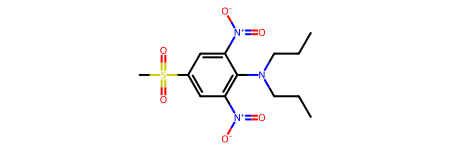

In [27]:
Chem.MolFromSmiles('CCCN(CCC)c1c([N+](=O)[O-])cc(S(C)(=O)=O)cc1[N+](=O)[O-]')

In [28]:
np_list_pds=pd.DataFrame(np_list, columns=['smiles'])

In [29]:
np_list_pds

,smiles
0,CC(C)CC(C)(C)C
1,CC(C)(C)C
2,Cc1cccc(C)c1
3,Cc1ccc(C(C)C)cc1
4,C=CCC
...,...
79,C=CCC=C
80,Cc1ccccc1C
81,c1ccc2c(c1)Cc1ccccc1-2
82,C1=CC=CCC=C1


In [30]:
np_list_pds['mol']=np_list_pds['smiles'].apply(lambda y: Chem.MolFromSmiles(y))

In [31]:
np_list_pds['mol'].isnull().sum()

0

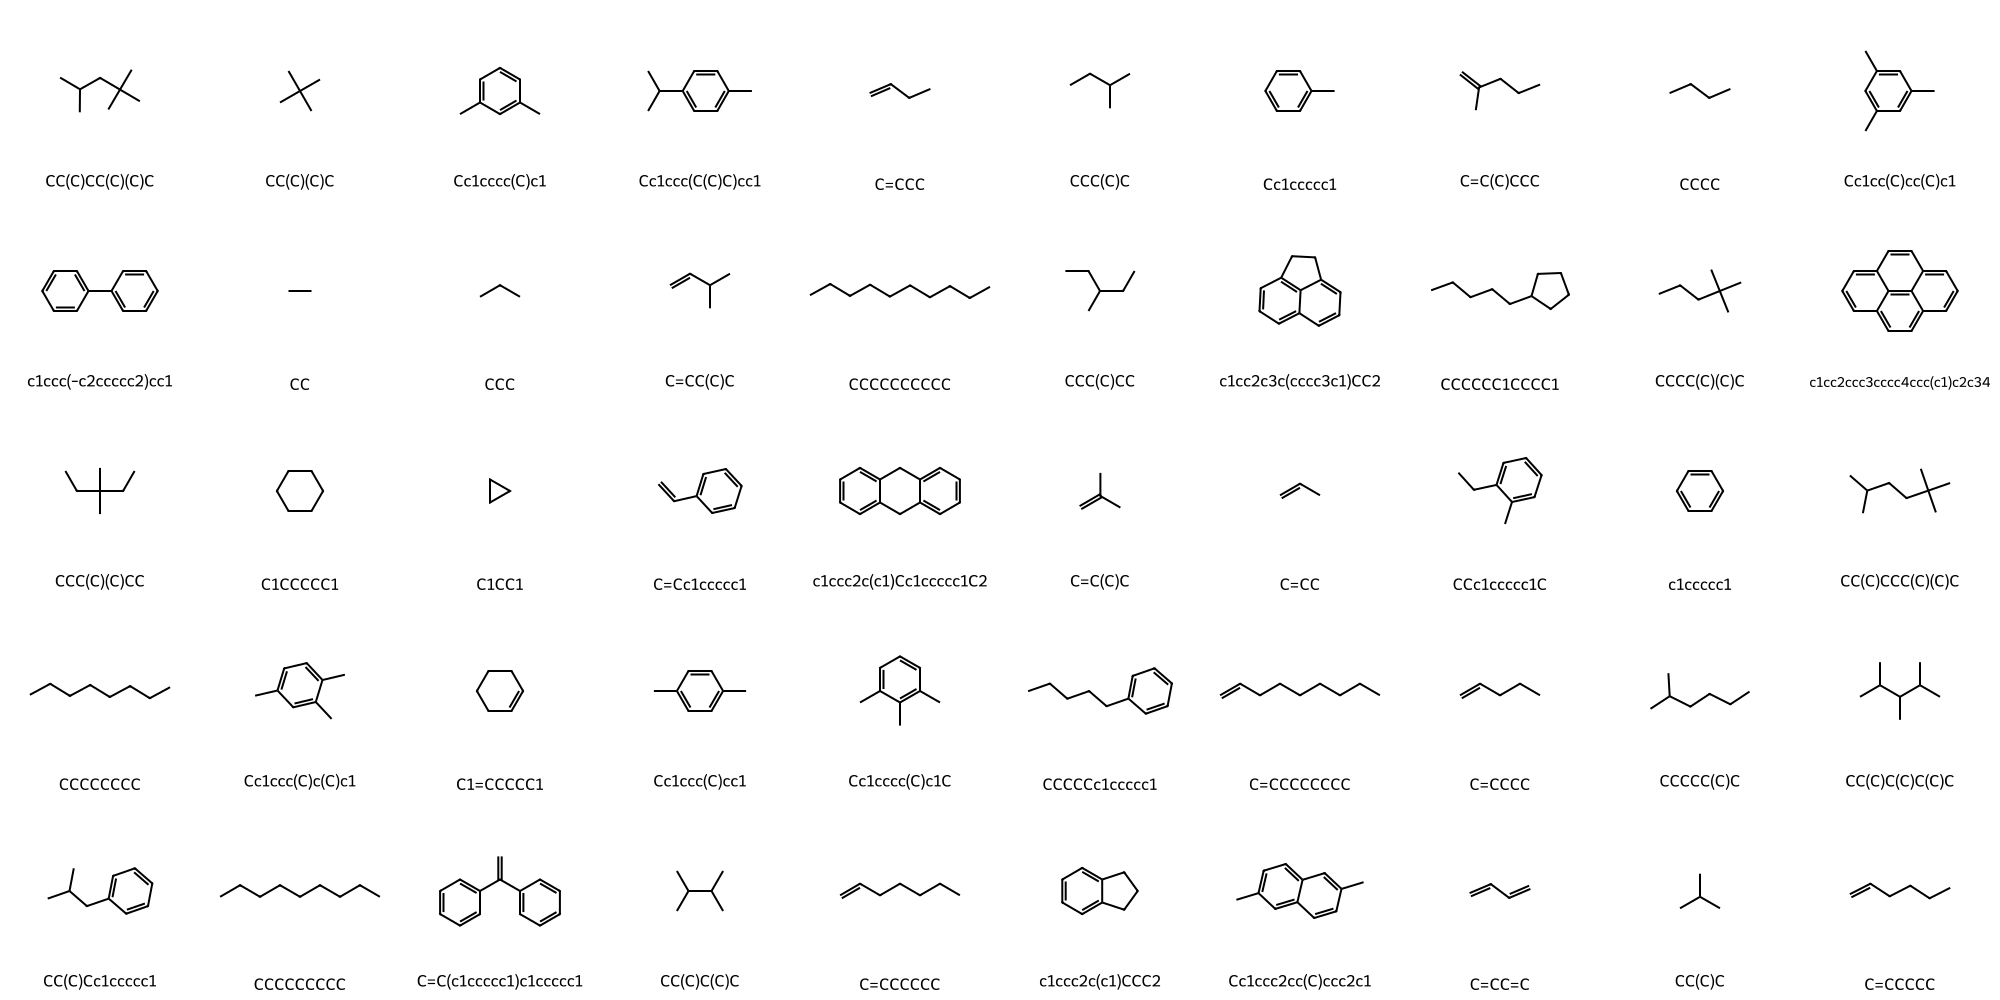

In [44]:
npmol=np_list_pds['mol'][:50]
Draw.MolsToGridImage(npmol, molsPerRow=10, useSVG=True, legends=list(np_list_pds['smiles'][:50].values))


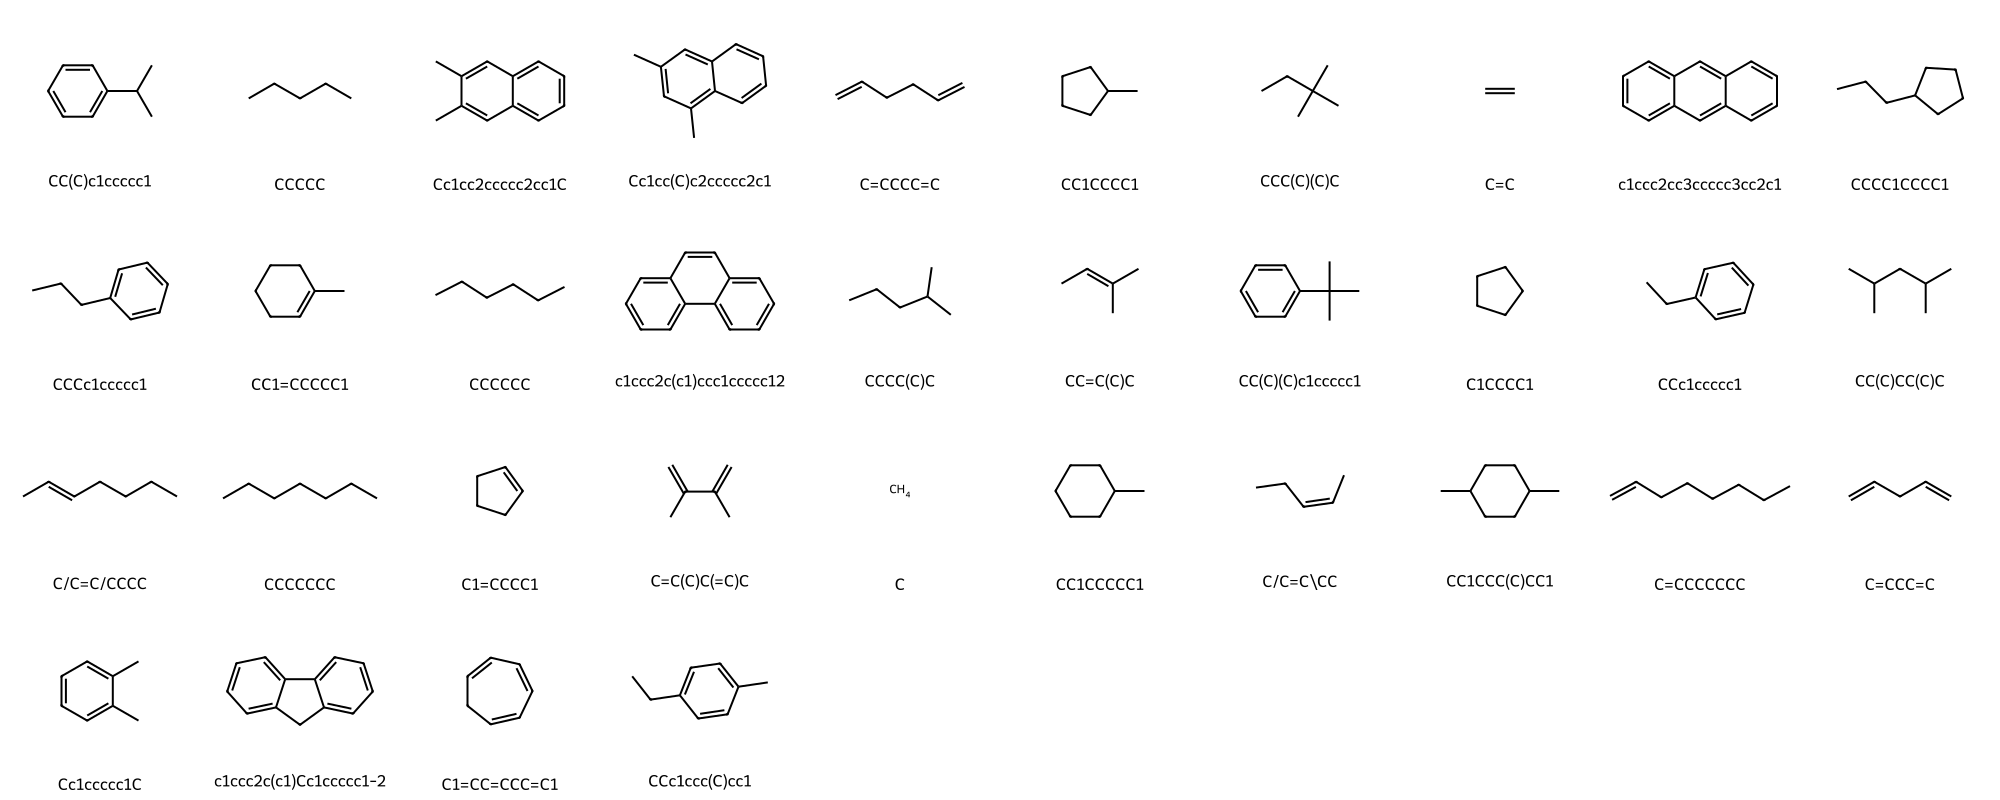

In [45]:
npmol=np_list_pds['mol'][50:85]
Draw.MolsToGridImage(npmol, molsPerRow=10, useSVG=True, legends=list(np_list_pds['smiles'][50:85].values))

In [ ]:
nplist50_string=nplist50.data
with open("np50.svg", "w") as f:
    f.write(nplist50_string)

In [26]:
smiles_df['mol']=smiles_df['all'].apply(lambda y: Chem.MolFromSmiles(y))

In [27]:
smiles_df['mol'].isnull().sum()

0

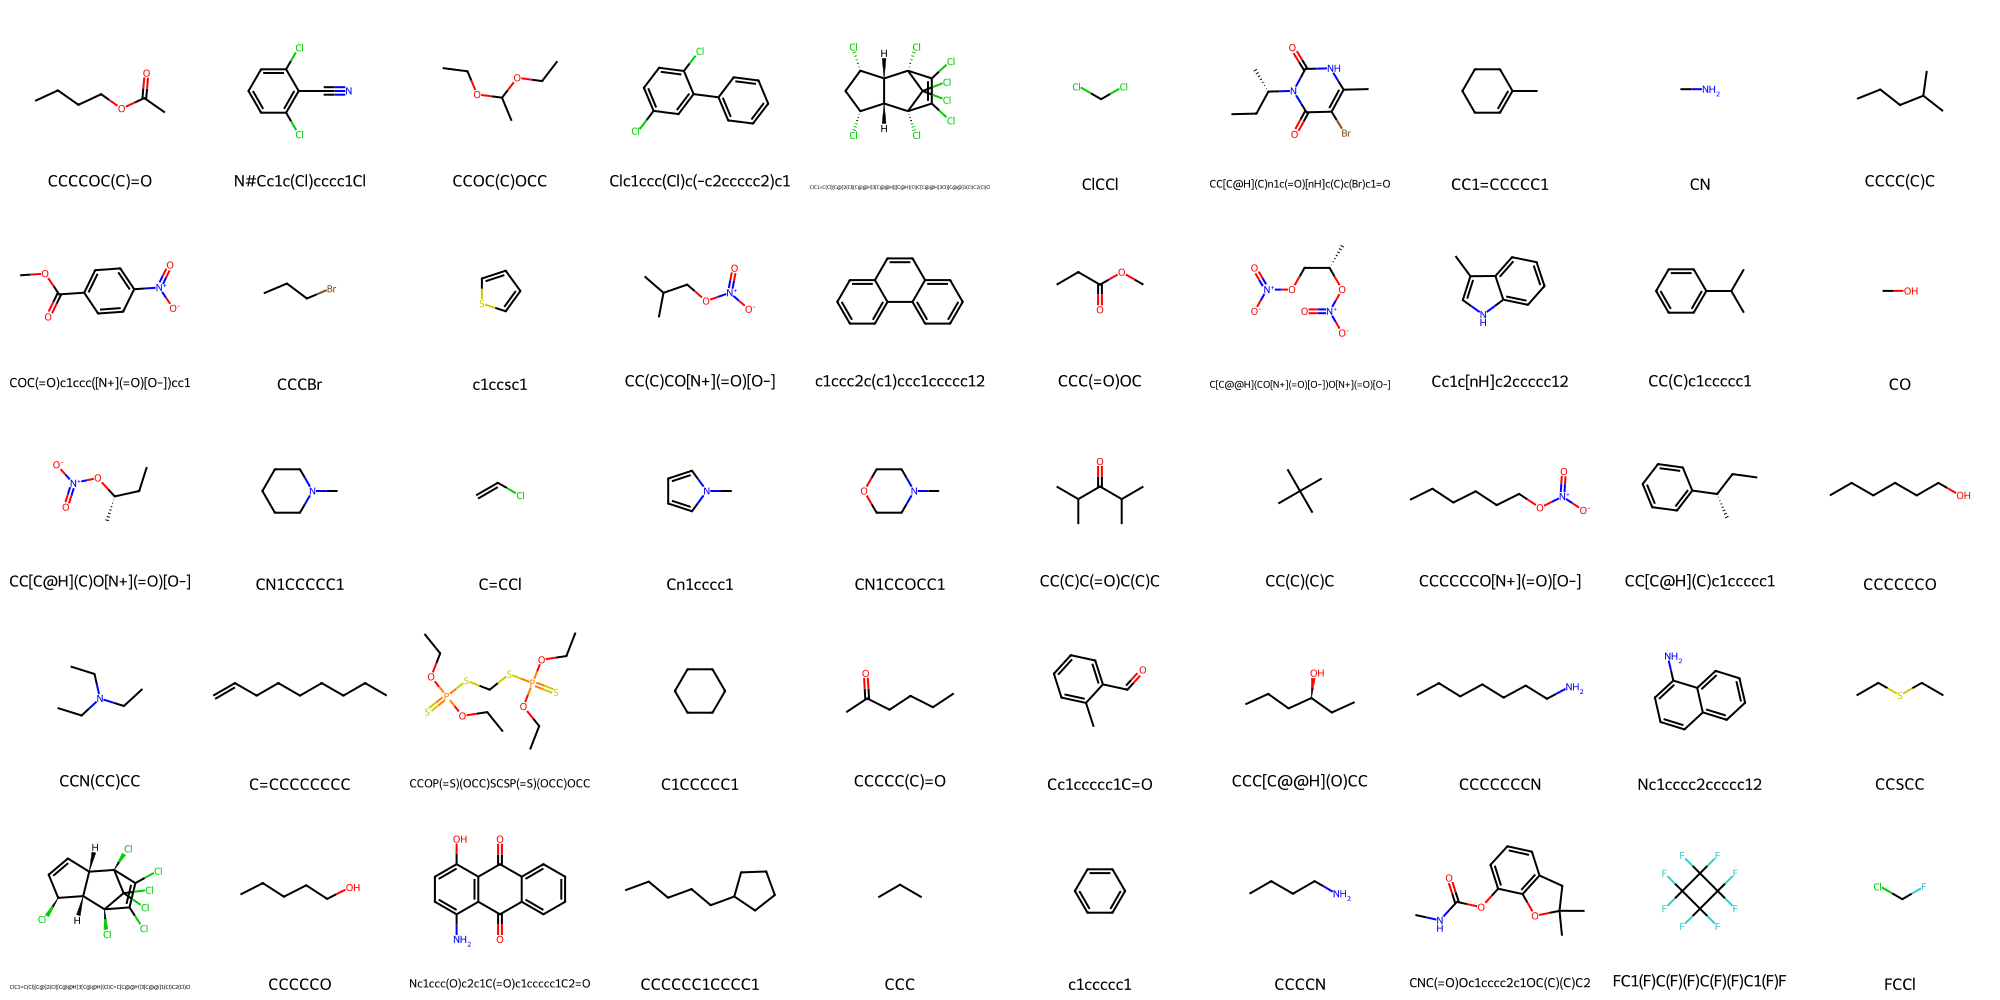

In [28]:
mol=smiles_df['mol'][:100]
Draw.MolsToGridImage(mol, molsPerRow=10, useSVG=True, legends=list(smiles_df['all'][:100].values))

In [29]:
mol=other_df['mol'][:20]
Draw.MolsToGridImage(mol, molsPerRow=5, useSVG=True, legends=list(other_df['Smiles_Others'][:20].values))

NameError: name 'other_df' is not defined

In [40]:
def get_figures(func_group):
    func_group_mols=[]
    matchlegend=[]
    for m in set(smiles_results[func_group]):
        if m != 'O':
            compounds=pubchempy.get_compounds(m, namespace='smiles')
            match = compounds[0]
            match_name=str(match.iupac_name)
            matchlegend.append(m)
            mol=Chem.MolFromSmiles(m)
            func_group_mols.append(mol)
    init_fig=MolsToGridImage(mols=func_group_mols, legends=matchlegend, molsPerRow=8, returnPNG=False)
    init_fig.save('%s_smiles.png'%func_group)
    ffig=Image.open('%s_smiles.png'%func_group)
    efig=ImageDraw.Draw(ffig)
    tfont=ImageFont.truetype("aileron_font/Aileron-Bold.otf", size=30)
    efig.text(xy=(10,8),text="%s"%func_group.upper(), font=tfont, align='center', fill=(255,0,0))
    ffig.save('%s_smiles.png'%func_group)
    return ffig

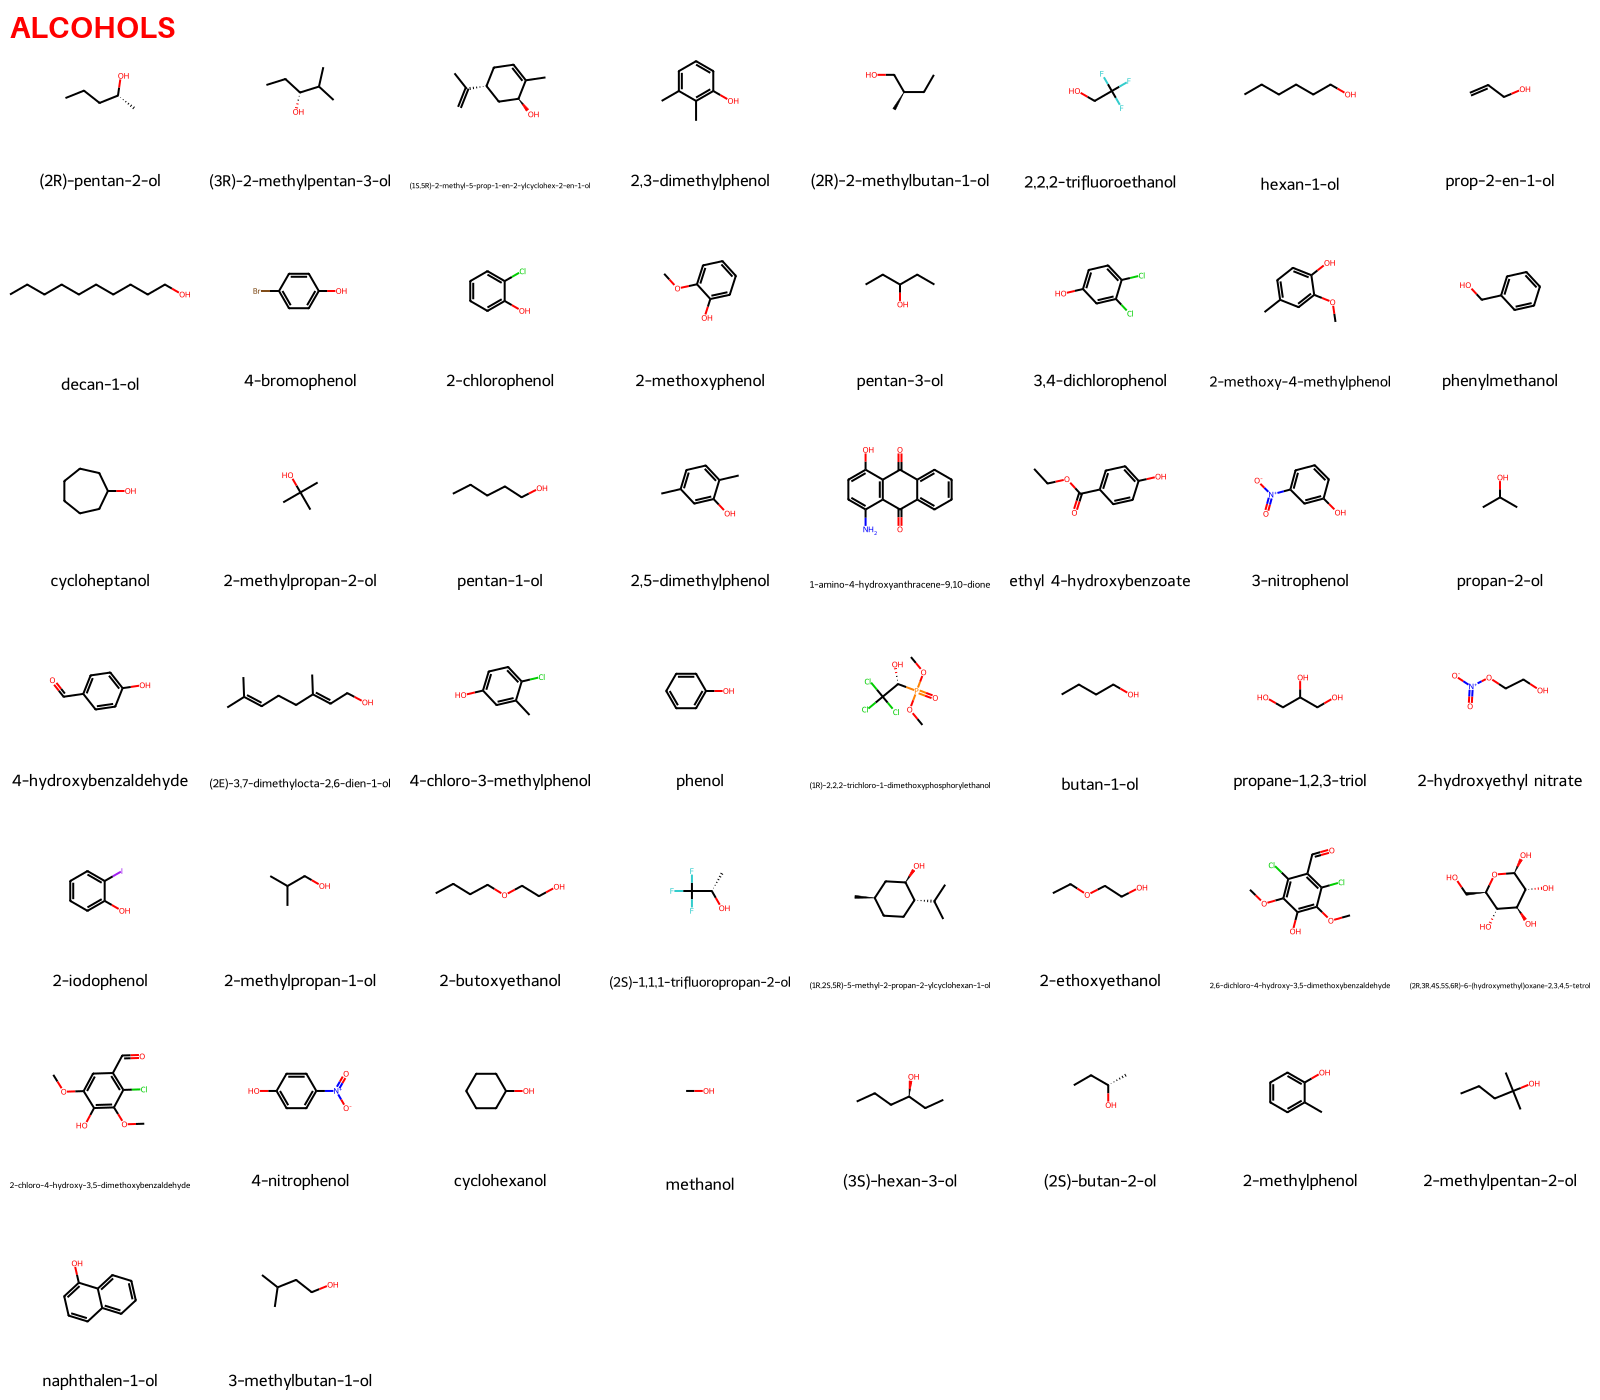

In [31]:
get_figures('alcohols')

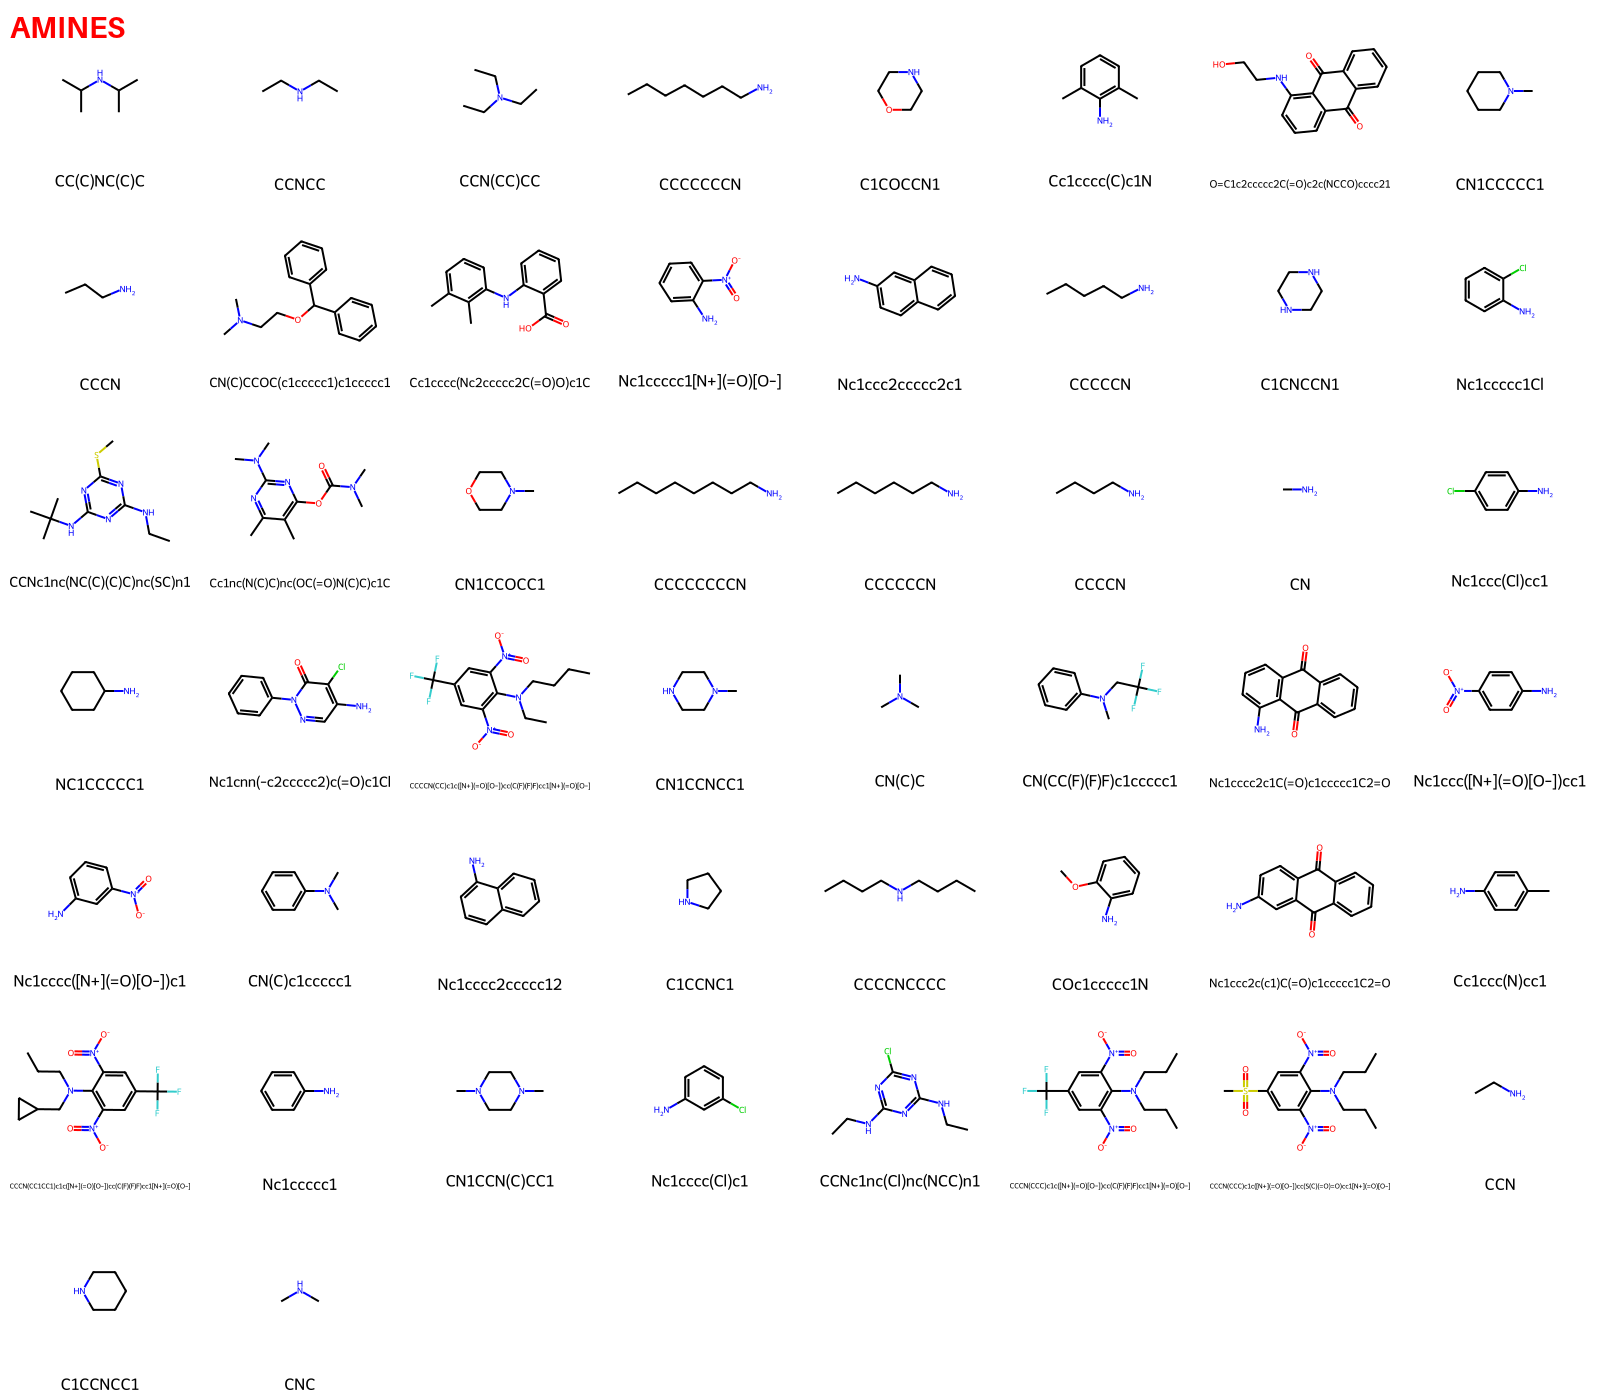

In [42]:
get_figures('amines')

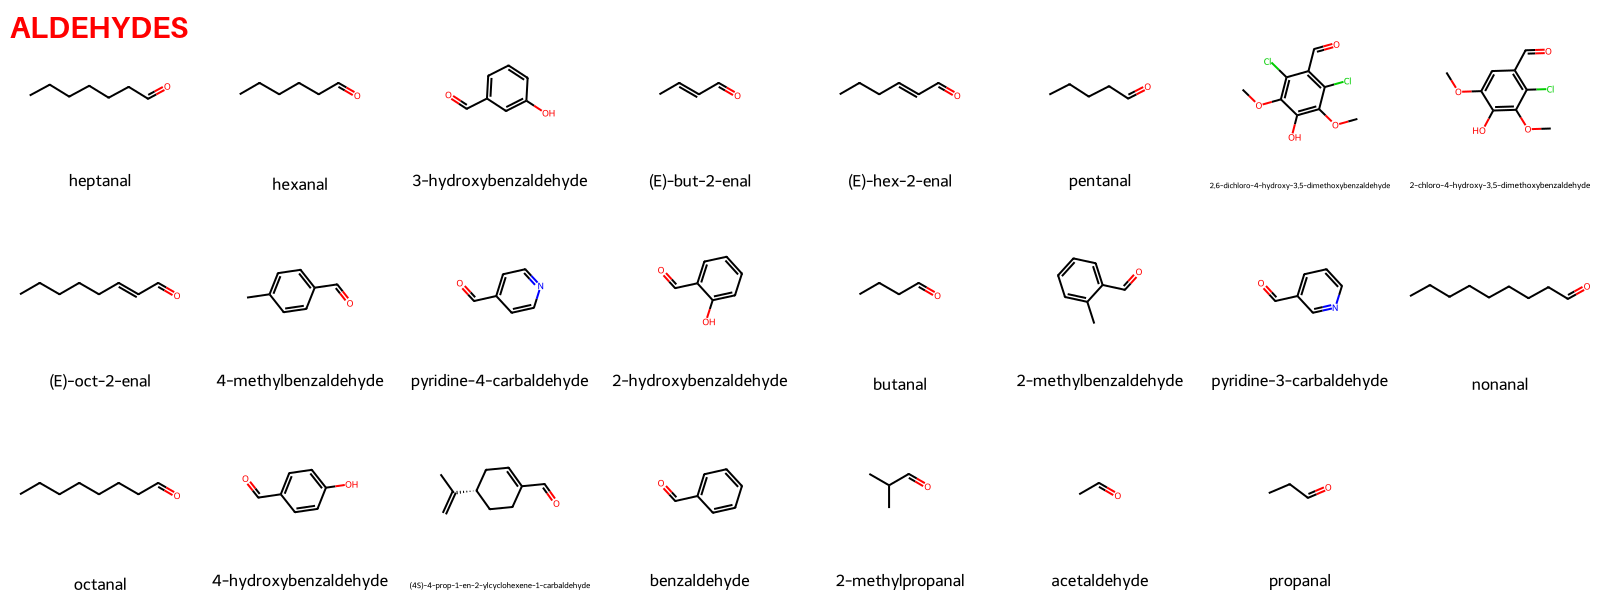

In [33]:
get_figures('aldehydes')

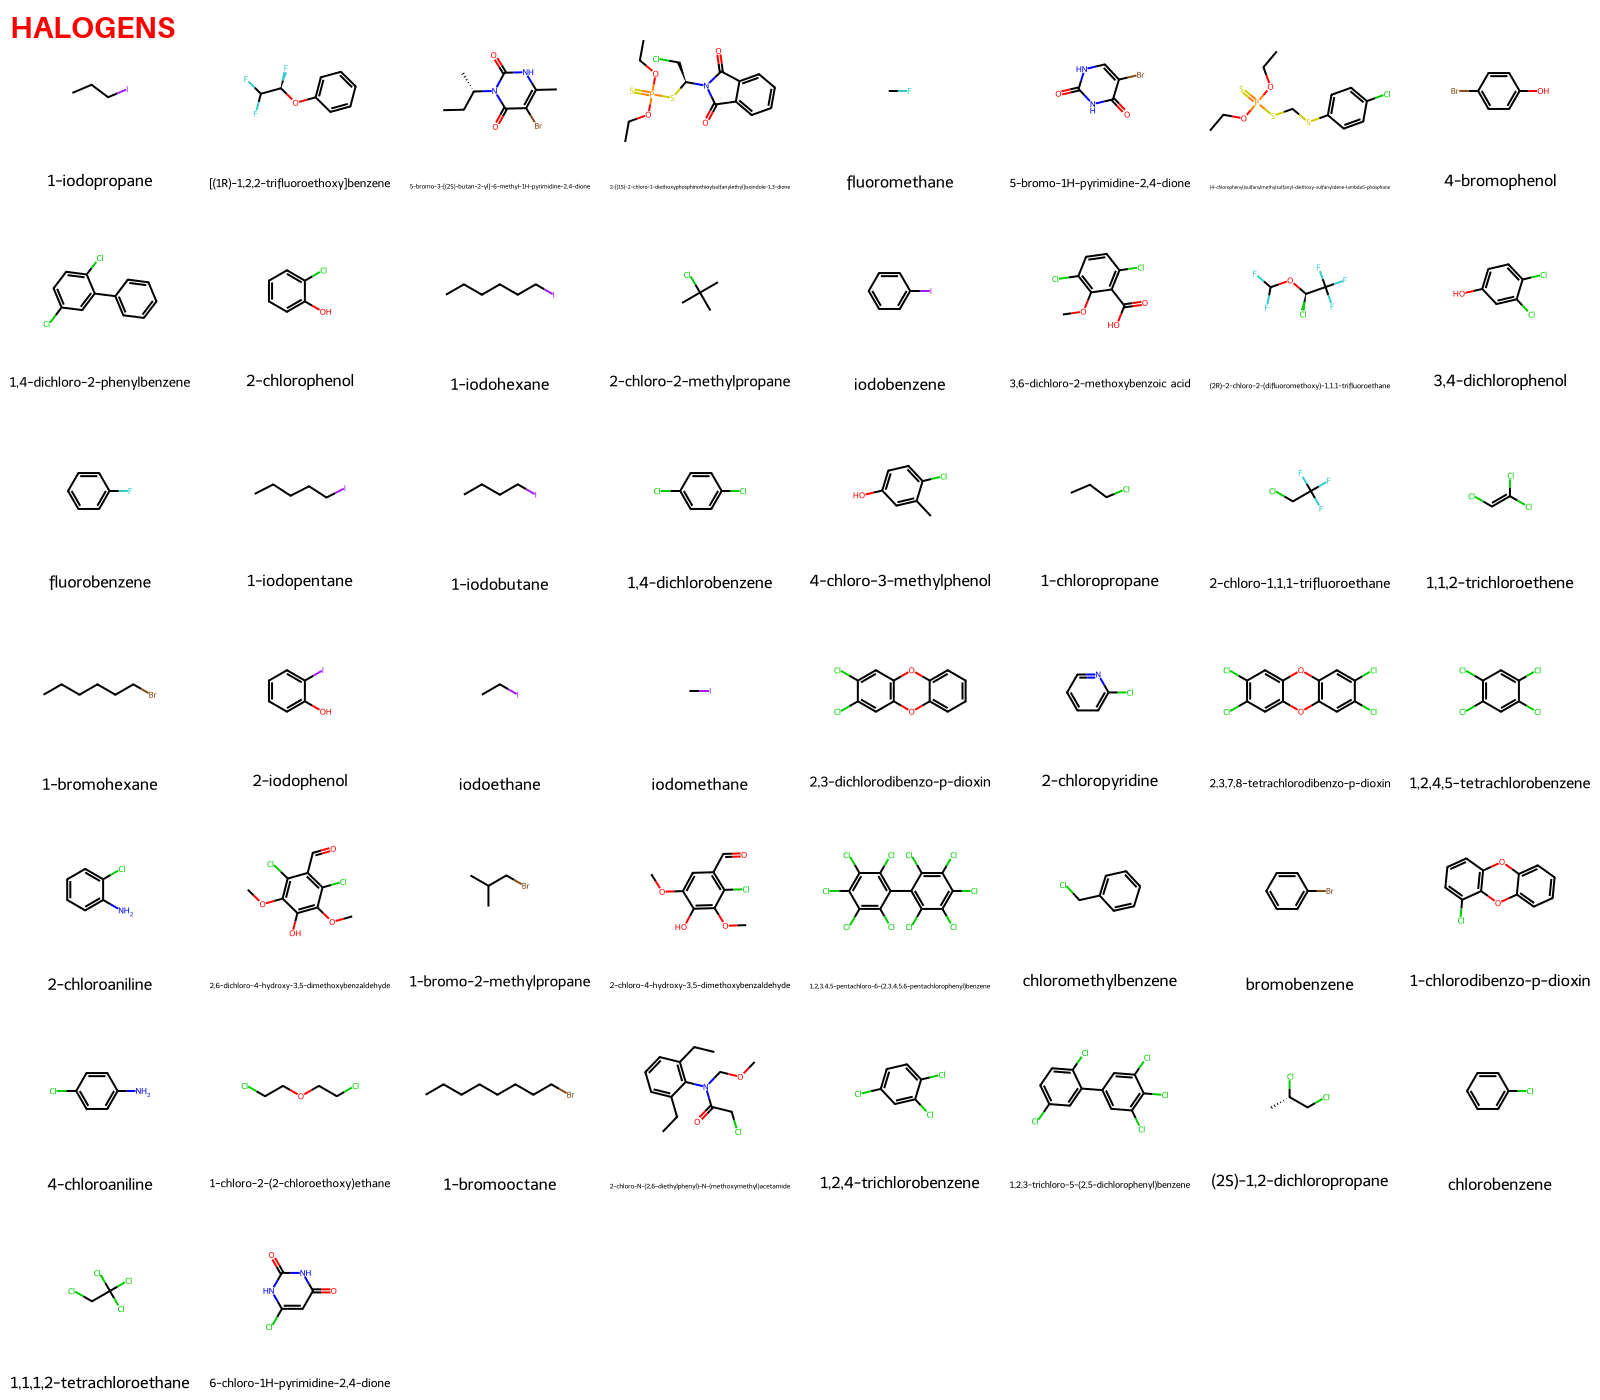

In [34]:
get_figures('halogens')

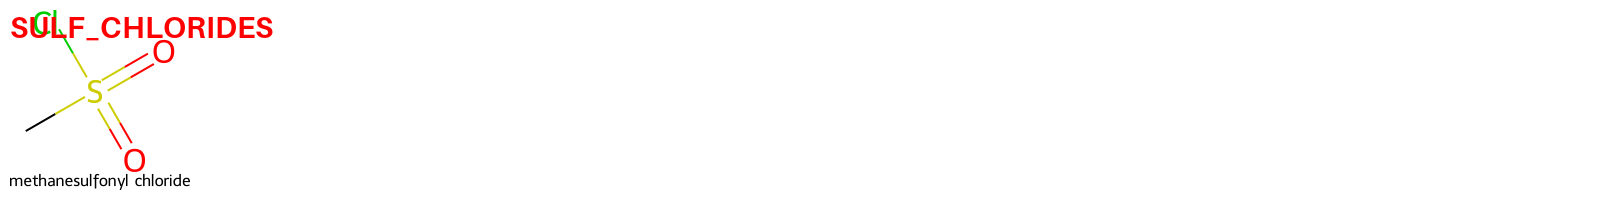

In [35]:
get_figures('sulf_chlorides')

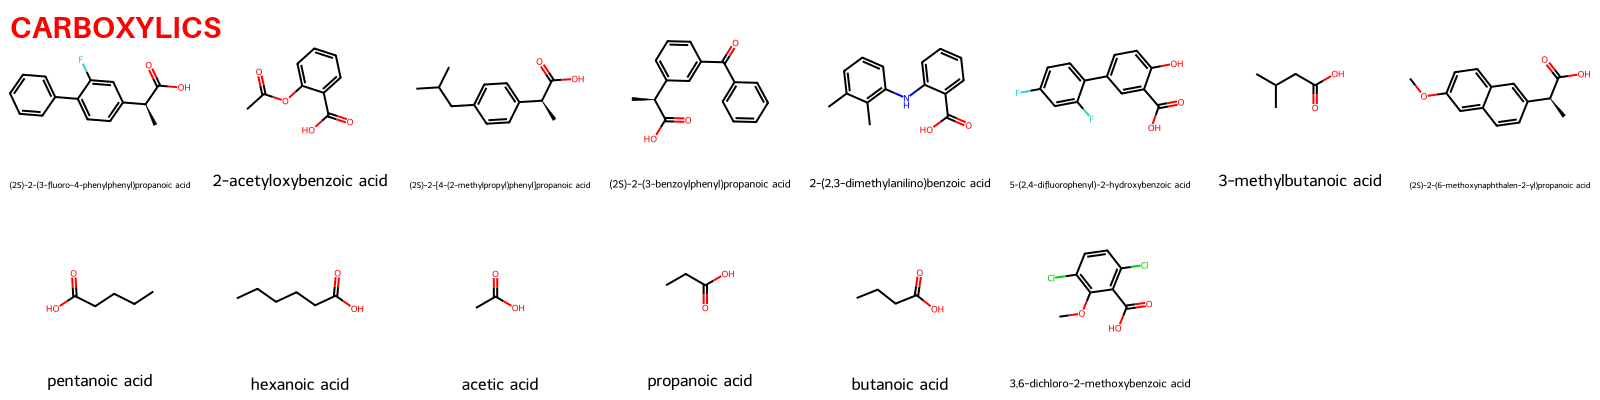

In [36]:
get_figures('carboxylics')

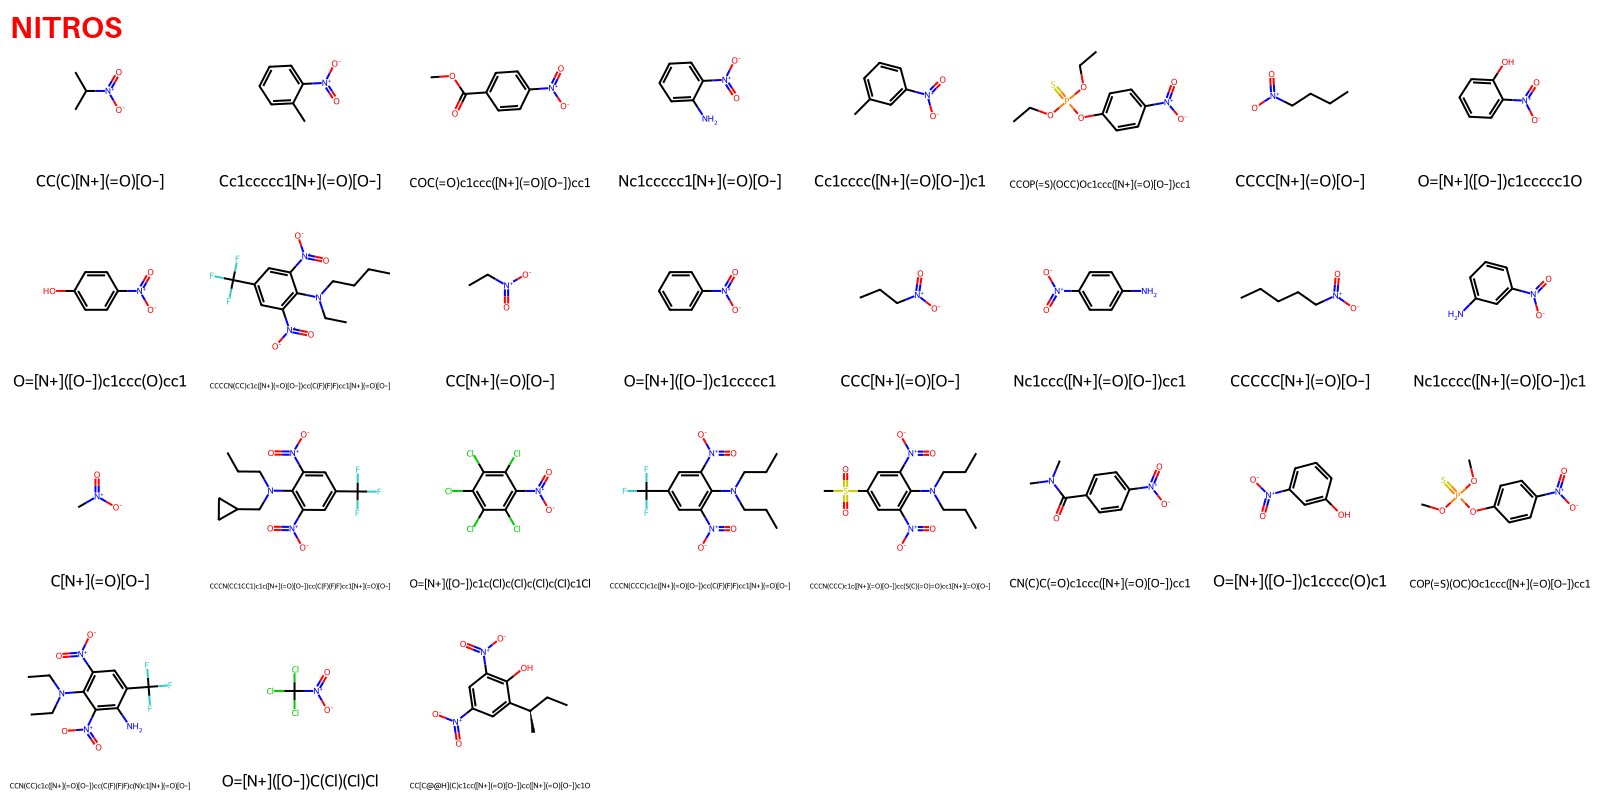

In [41]:
get_figures('nitros')

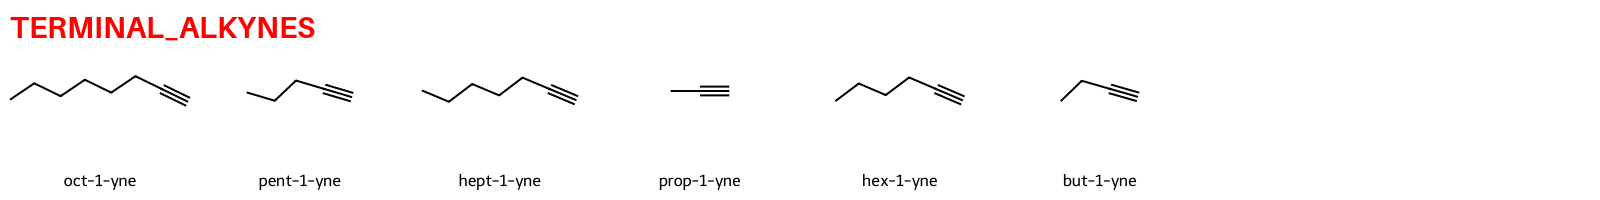

In [38]:
get_figures('terminal_alkynes')

In [39]:
get_figures('both')

KeyError: 'both'

In [ ]:
get_figures('other')

BadRequestError: 'PUGREST.BadRequest: error: '

In [ ]:
sfes_df

,Id,Temperature (K),Pressure (kPa),Phase,N Components,Component 1,Role 1,Mole Fraction 1,Exact Amount 1,Component 2,Role 2,Mole Fraction 2,Exact Amount 2,SolvationFreeEnergy Value (kJ / mol),SolvationFreeEnergy Uncertainty (kJ / mol),Source
0,265c7378309c4355aa01d60af70d3fca,298.15,101.325,Liquid,2,O,Solvent,1.0,None,CCCCCC(=O)OC,Solute,None,1,-10.41816,2.5104,10.1021/ct050097l
1,f89c43a7ef684aca89df924b29c487b1,298.15,101.325,Liquid,2,O,Solvent,1.0,None,CCCCO,Solute,None,1,-19.74848,2.5104,10.1021/ct050097l
2,198b886769694cc39828af5af498fd24,298.15,101.325,Liquid,2,O,Solvent,1.0,None,Clc1ccc(-c2cc(Cl)c(Cl)c(Cl)c2Cl)cc1Cl,Solute,None,1,-12.71936,0.4184,10.1007/s10822-012-9568-8
3,6cdf0d7abd354d8284ffe115d4c0ef33,298.15,101.325,Liquid,2,O,Solvent,1.0,None,NC1CCCCC1,Solute,None,1,-19.20456,2.5104,10.1021/ct050097l
4,e3e4778832a240eba754b5d4d010d21d,298.15,101.325,Liquid,2,O,Solvent,1.0,None,O=COc1ccccc1,Solute,None,1,-15.98288,2.5104,10.5281/zenodo.596537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,0821476bf69143c4bd07f6e0d7f8e584,298.15,101.325,Liquid,2,O,Solvent,1.0,None,Cl/C=C/Cl,Solute,None,1,-3.26352,2.5104,10.1021/ct050097l
638,2e03601fd70142dd8092cc1eceb17b83,298.15,101.325,Liquid,2,O,Solvent,1.0,None,CCc1ccc(C)cc1,Solute,None,1,-3.97480,2.5104,10.1021/ct050097l
639,4ceca25966d64d3c88b9380829e7fa86,298.15,101.325,Liquid,2,O,Solvent,1.0,None,CCBr,Solute,None,1,-3.09616,2.5104,10.1021/ct050097l
640,bca16f5d94f54cf987903bcec2f9662b,298.15,101.325,Liquid,2,O,Solvent,1.0,None,CC(C)SC(C)C,Solute,None,1,-5.06264,2.5104,10.1021/ct050097l


In [ ]:
sfes_df.to_csv('sfes_experimental_dataset.csv')